# Generating Fake Data

We call this "fake data" because it doesn't represent anything (we didn't get the numbers from a database). We can use this fake data to practice learning how to find and fit transiting exoplanet lightcurves.

In [1]:
import numpy as np

np.random.seed(123) # this just makes sure our random data doesn't 
                    # change each time we re-run the next cell

# we'll start with a generated array
x = np.arange(-20, 20) # array goes from -20 to 19 (20-1)
print('This is the length of this array:', len(x))

This is the length of this array: 40


To make a plot, we need both $x$ and $y$ values. Let's make the $y$ values now:

In [2]:
y = x**2 + np.random.normal(0, 40, len(x))

# make fake error bars
yerror = np.random.normal(10, 30, len(x))

<ErrorbarContainer object of 3 artists>

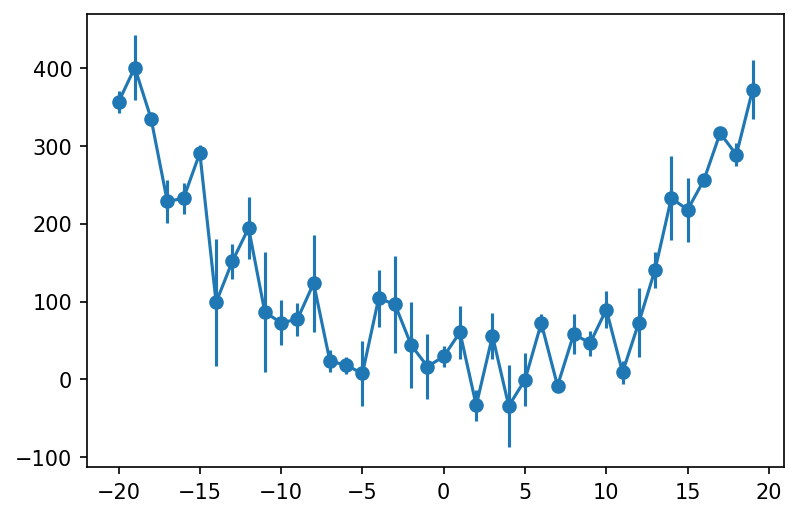

In [3]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(dpi=150)

ax.errorbar(x, y, yerror, marker='o')

Plot some lines:

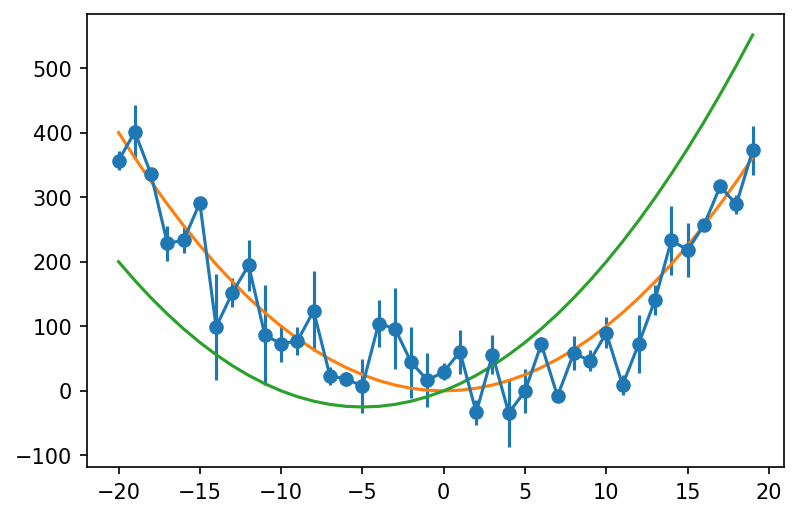

In [4]:
line1 = x ** 2
line2 = x ** 2 + 10 * x

f, ax = plt.subplots(dpi=150)

ax.errorbar(x, y, yerror, marker='o')
ax.plot(x, line1)
ax.plot(x, line2)

It looks like the orange line follows the blue points better. We can pretend like this was done on purpose (like we "fit" the blue points and calculated the orange line). 

One way to tell how good our fit is to do a test called a "Chi-Squared Test". The basic goal of this test to to get the smallest number possible.

```{math}
:label: chi-squared
\sum{\frac{(y-fit)^2}{yerror^2}}
```

In [5]:
chi_1 = ((y - line1) ** 2 / yerror ** 2).sum()
chi_2 = ((y - line2) ** 2 / yerror ** 2).sum()

print("Chi-squared for orange line:", chi_1)
print("Chi-squared for green line:", chi_2)

Chi-squared for orange line: 604.4195763643096
Chi-squared for green line: 21859.30767472156


Notice that the orange line has the smaller number! This is good, because we could tell by eye that the orange line was doing a better job following the blue points. Now we have that chi-squared statistic to back our statement up!

## Making Fake Transit Data

Okay, so now that we're experts with making fake data, let's make some fake astronomy data!  Recall from the lecture that when a planet crosses in front of its host star (from our point of view), the brightness dips.  We'll look at that now with some fake data.

Text(0, 0.5, 'Brightness')

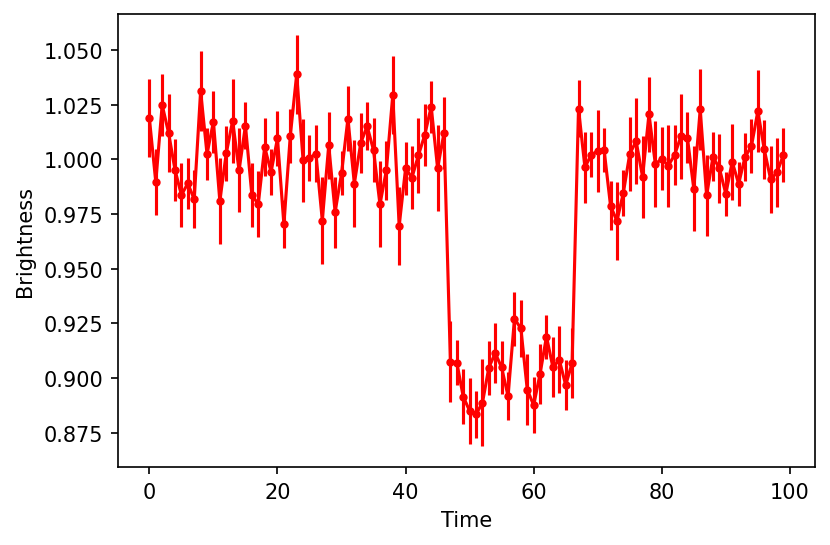

In [6]:
t = np.arange(0, 100) # calling it t because this is going to represent time!

# when no planet is passing in front of the star,
# the brightness of the star doesn't change (for our work)
measurements = np.ones(len(t)) # this is just saying that

# when the planet passes in front of the star,
# the brightness will go down.  Let's choose a random
# spot for this to happen, using indexing
# (indexing is just choosing certain values in our list)
measurements[47:67] = 0.9 # play with adding your own!

# now we're going to add some randomness to the fake data
measurements = measurements + np.random.normal(0, 0.015, len(t))

# making some fake error bars
errors = 0.01 + np.random.uniform(0, 0.01, len(t))


f, ax = plt.subplots(dpi=150)

ax.errorbar(t, measurements, errors, color='r', marker='.')
ax.set_xlabel("Time")
ax.set_ylabel("Brightness")

Do you see where the dip is? That's where we have decided the planet is crossing in front of the star in our fake data.

## A Little More Scientific

We're going to make code that can fit a line to our fake astronomy data. We're going to use a thing call a "function". This is code that we can define to do a certain task give particular values.

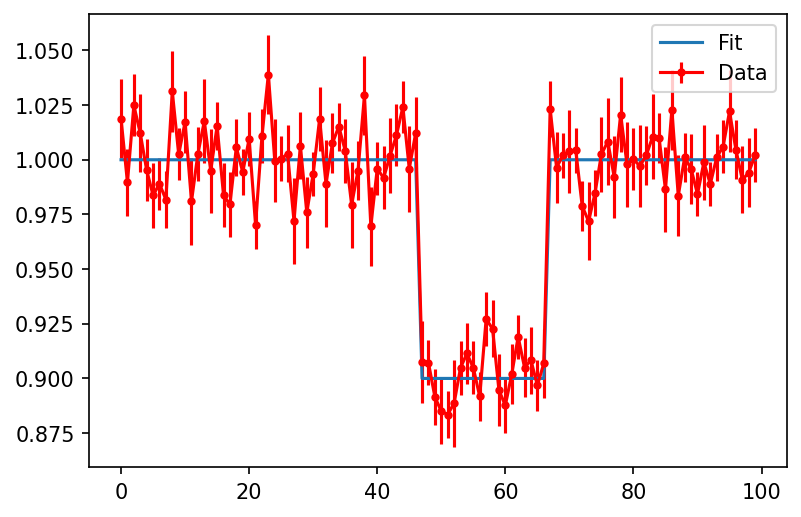

In [7]:
# in this function, we provide our time array,
# choose the start and stop points for when our planet
# crosses in front of the star, and how much the brightness
# changes when this happens

def square_dip(t, start, stop, depth):
    transit_expected = np.ones(len(t))
    transit_expected[start:stop] = depth

    return transit_expected

# this function will give the line "fit" for the exoplanet transit
fake_fit = square_dip(t, 47, 67, 0.9)

f, ax = plt.subplots(dpi=150)

ax.errorbar(t, measurements, errors, color='r', marker='.', label='Data')
ax.plot(t, fake_fit, label="Fit")
ax.legend()

Perfect! The blue line follows the red points really well (and we'll do our chi-squared test in a second) but first I want to point something out.  Because we made our fake data and got to choose *exactly* where the dip happens... well then of course we could fit it so nicely!

This is fine, because right now we're learning -- but with real astronomy data, we would have to play with changing the numbers that we plug into our "square_dip" function for a little until we would get the right fit.